In [26]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [8]:
#download the data set in training and testing sets and apply transforms
#Why transforms??

train= datasets.MNIST("", train = True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("", train = False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [16]:
#load the data sets in training sets and testing sets, apply shuffling and batch sizes for training
#why shuffle and batch size??

trainset=torch.utils.data.DataLoader(train,shuffle=True, batch_size=10)

testset=torch.utils.data.DataLoader(test,shuffle=True, batch_size=10)

#print(testset)

In [18]:
#print sample data which is collection of tensors
#first tensor[0][0] consists of pixels of images
#tensor[0][1] consists of values corresponding to those pixels

for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

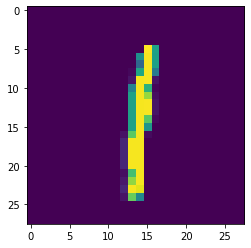

In [29]:
#visualize our data using .imshow f()

x,y=data[0][0],data[1][0]
plt.imshow(x.view(28,28))
plt.show()

In [31]:
total=0.0
counter_data={0:0,1:0, 2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

In [34]:
""""
Cgeck if data is balanced or not
""""
for data in trainset:
    xs,ys=data
    for y in ys:
        counter_data[int(y)]+=1
        total+=1
        

In [39]:
print(counter_data)
for i in counter_data:
    print(f"{i}: {counter_data[i]/total*100}")
    #print((counter_data[i]/total)*100)

{0: 11846, 1: 13484, 2: 11916, 3: 12262, 4: 11684, 5: 10842, 6: 11836, 7: 12530, 8: 11702, 9: 11898}
0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [42]:
import torch.nn as nn
import torch.nn.functional as F

In [57]:
class Net(nn.Module):
    #Here we initialize the fully connected layers 
    #note that its only fully connected i.e no convnets!
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,64)
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        self.fc4=nn.Linear(64,32)
        self.fc5=nn.Linear(32,10)
     
    #add activation functions
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.relu(self.fc4(x))
        x=self.fc5(x)
        
        return F.log_softmax(x, dim=1)
        

In [62]:


net=Net()
print(net)
X=torch.randn((28,28))
X=X.view(-1,28*28)
output=net(X)
print(output)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (fc5): Linear(in_features=32, out_features=10, bias=True)
)
tensor([[-2.3567, -2.1201, -2.2870, -2.4177, -2.3109, -2.3603, -2.3529, -2.2276,
         -2.1673, -2.4814]], grad_fn=<LogSoftmaxBackward>)


In [74]:
import torch.optim as optim



optimizer=optim.Adam(net.parameters(), lr=0.001)   #this is loss optimizer that converges to reduce the loss that we get
epochs=3
for ep in range(epochs):
    for data in trainset:   #remember trainset is divided into batches of 10
        X,y=data
        #print(X[0][0])
        #print(y)
        net.zero_grad()   #we zero the gradients after we train at particular batch
        output=net(X.view(-1,28*28))  #passing input images to our layer
        loss=F.nll_loss(output,y)    #calculate errors
        loss.backward()             #propogate the losses backward
        optimizer.step()
    print(loss)


tensor(0.0488, grad_fn=<NllLossBackward>)
tensor(0.0253, grad_fn=<NllLossBackward>)
tensor(0.0645, grad_fn=<NllLossBackward>)


In [75]:
correct=0
total=0

with torch.no_grad():
    for data in trainset:
        X,y=data
        output=net(X.view(-1,784))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print()

In [77]:
print("accuracy", (correct/total)*100)

accuracy 98.81


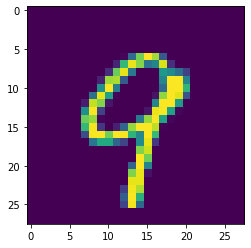

tensor(9)


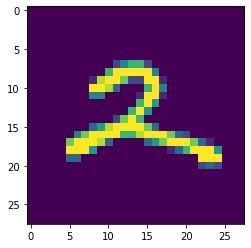

tensor(2)


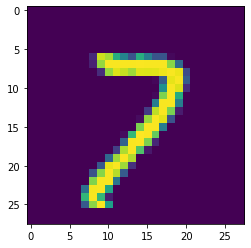

tensor(7)


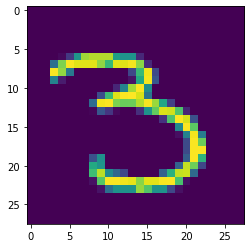

tensor(3)


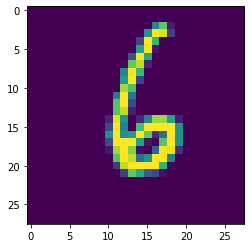

tensor(6)


In [84]:
plt.imshow(X[0].view(28,28))
plt.show()

print(torch.argmax(net(X[0].view(-1,784))[0]))

plt.imshow(X[6].view(28,28))
plt.show()

print(torch.argmax(net(X[6].view(-1,784))[0]))

plt.imshow(X[3].view(28,28))
plt.show()

print(torch.argmax(net(X[3].view(-1,784))[0]))

plt.imshow(X[8].view(28,28))
plt.show()

print(torch.argmax(net(X[8].view(-1,784))[0]))

plt.imshow(X[9].view(28,28))
plt.show()

print(torch.argmax(net(X[9].view(-1,784))[0]))